In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

random_state = 42

In [2]:
df_turns_usable = pd.read_csv('fig_3.csv')

Comparison (0, 1): U = 5.0 | p-value = 0.3333
Comparison (1, 2): U = 136.0 | p-value = 0.2528
Comparison (2, 3): U = 6524.0 | p-value = 3.474e-10
Comparison (3, 4): U = 55576.5 | p-value = 1.926e-56


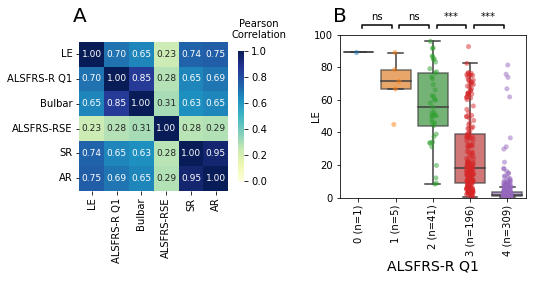

In [3]:
mycorr = df_turns_usable.corr()
mycorr.index =           ['LE','ALSFRS-R Q1', 'Bulbar','ALSFRS-RSE', 'SR','AR']
mycorr.columns = mycorr.index

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

dataplot = sns.heatmap(np.abs(mycorr), fmt=".2f", cmap="YlGnBu", annot=True, vmin=0, ax=axs[0], annot_kws={"size": 9}, cbar_kws={"shrink": 0.8}) 
dataplot.text(x=7.25, y=-.5,va='center', ha='center', s="Pearson\nCorrelation",fontsize=10)

dataplot.set_aspect('equal','box')
dataplot.text(x=0, y=-1, va='center',ha='center', s='A',fontsize=20)

def rayita(x,y,s):
    xx = [x[0],x[0],x[1],x[1]]
    yy = [y[0],y[1],y[1],y[0]]
    line = plt.plot(xx,yy,'-k')
    line[0].set_clip_on(False)
    plt.text(x=np.mean(x),y=2*y[1]-y[0],s=s,va='bottom',ha='center')
    
df_plot = df_turns_usable.copy()
df_plot['alsfrsr_1'] = df_plot['alsfrsr_1'].astype(int)
sns.stripplot(data=df_plot, x='alsfrsr_1',y='effort_mean',ax=axs[1],alpha=0.5)
ax = sns.boxplot(data=df_plot, x='alsfrsr_1',y='effort_mean',ax=axs[1], boxprops=dict(alpha=.7),fliersize=0)
alsfrsr_1_value_counts = df_plot.alsfrsr_1.value_counts().sort_index()
xticks_labels = [f'{i} (n={alsfrsr_1_value_counts[i]})' for i in alsfrsr_1_value_counts.index]
ax.set_xticklabels(xticks_labels)
ax.tick_params(axis='x', rotation=90)
plt.gca().yaxis.set_label_coords(-0.1,0.5)

# Perform Mann-Whitney U test for each pair
pairs=[(0, 1), (1, 2), (2, 3), (3, 4)]
for pair in pairs:
    group_1 = df_turns_usable[df_turns_usable['alsfrsr_1'] == pair[0]]['effort_mean']
    group_2 = df_turns_usable[df_turns_usable['alsfrsr_1'] == pair[1]]['effort_mean']
    U, p_value = mannwhitneyu(group_1, group_2, alternative='two-sided')
    print(f"Comparison {pair}: U = {U} | p-value = {p_value:.4g}")

x,y,s = [0.1,0.9], [104,106], 'ns'
rayita(x,y,s)
x,y,s = [1.1,1.9], [104,106], 'ns'
rayita(x,y,s)
x,y,s = [2.1,2.9], [104,106], '***'
rayita(x,y,s)
x,y,s = [3.1,3.9], [104,106], '***'
rayita(x,y,s)

plt.ylim([0,100])
plt.xlabel('ALSFRS-R Q1', fontsize=14)
plt.ylabel('LE')
plt.text(x=-.5, y=111, va='center',ha='center',s='B',fontsize=20)

plt.subplots_adjust(wspace=0.4)  # Increase horizontal space between subplots

### p-vals of correlations

In [4]:
df_corr = df_turns_usable.copy()

for col1, col2 in [
    ('effort_mean', 'alsfrsr_1'),
    ('effort_mean', 'bulbar'),
    ('effort_mean', 'speaking_rate_mean'),
    ('effort_mean', 'articulation_rate_mean'),
    ('speaking_rate_mean', 'articulation_rate_mean'),
]:

    corr, p_val = pearsonr(df_corr[col1], df_corr[col2])
    
    print(f"{col1} vs {col2}: corr={corr:.2f}, p={p_val:.3f}")

effort_mean vs alsfrsr_1: corr=-0.70, p=0.000
effort_mean vs bulbar: corr=-0.65, p=0.000
effort_mean vs speaking_rate_mean: corr=-0.74, p=0.000
effort_mean vs articulation_rate_mean: corr=-0.75, p=0.000
speaking_rate_mean vs articulation_rate_mean: corr=0.95, p=0.000
